# 2.2 Overview of the PyData Stack

This notebook is designed to give you a brief overview of the PyData stack: a collection
of Python packages that are used for data science. Here I introduce the most
important packages in the PyData stack: NumPy, SciPy, Pandas, Matplotlib, StatsModels, and scikit-learn. 
I'll also show you some examples of Seaborn and iPyWidgets.

I'll also demonstrate some features of Jupyter Notebooks in VS Code.
Although Jupyter Notebooks are not always the right medium for your code, it will also demonstrate some of the features of Jupyter and Jupyter Notebooks that make them useful for data exploration and visualization.

IMPORTANT NOTE: This is just meant to be a whirlwind overview of the important Python packages for data science. It's just an overview. We'll dig into the details over the next few class sessions. The point of this notebook is just to showcase what CAN be done and to make sure that you can download the code for the course and run it in VS Code. We'll learn how to write the code below over the next few weeks and throughout the next quarter. **After getting a look at what's possible in this notebook, we'll start from the very basics in the next notebook.** 

You can try running this code yourself. If you don't have VS Code installed, please do so ASAP. In a pinch, you can run this in Google Colaboratory: `https://colab.research.google.com/` You can open this notebook directly in Google Colaboratory by clicking here: [Open in Google Colaboratory.](https://colab.research.google.com/github/jmbejara/finm-python-crash-course/blob/main/src/01_python_for_data_science_demo.ipynb)

This notebook will start by setting up the environment and then will demonstrate some examples from NumPy, SciPy, Pandas, Matplotlib, and StatsModels (with some bonus examples from Seaborn and iPyWidgets.) This collection of packages represent the foundation of what is called the PyData stack (ecosystem):

<div>
<img src="http://chris35wills.github.io/courses/pydata_stack.png" width="1000"/>
</div>



## 0. Set up Environment

- Let's first make sure that everyone was able to download the code from GitHub. Please raise your hand if you are not able to open the project folder in VS Code.

- Now, before we start, we need to set up our environment. We need to install the packages that we need (if they aren't installed already) and then we need to load the packages into Python.

In [1]:
## Install required packages, but do automatically only if running within Google Colaboratory
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install plotly==5.9.0
else:
  print("Be sure to install the required packages manually if not in Colab")

Be sure to install the required packages manually if not in Colab


In [35]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.express as px

sns.set()

## 1. NumPy

NumPy a library designed to add support "for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."

A good beginner tutorial can be found on the official NumPy website here: https://numpy.org/doc/stable/user/absolute_beginners.html

The basic functionality of NumPy is the efficient management of arrays, with syntax as follows:
<div>
<img src="https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png" width="1000"/>
</div>

In [36]:
a = np.array([1, 2, 3])

In [37]:
a

array([1, 2, 3])

In [38]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [39]:
B = np.array([
    [1, 0], 
    [0, 1]])
B

array([[1, 0],
       [0, 1]])

In [7]:
A @ B

array([[1, 2],
       [3, 4]])


<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Matrix_multiplication_qtl1.svg" width="1000"/>
</div>


In [40]:
b = np.array((1,2))
x = np.linalg.solve(A, b)
x

array([0. , 0.5])

In [41]:
A @ x

array([1., 2.])

In [42]:
eigval, eigvec = np.linalg.eig(A)
eigval

array([-0.37228132,  5.37228132])

In [44]:
eigvec

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

## 2. SciPy

SciPy is a library "used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering."

For example, consider calculating the following integral.
$$
\int_0^1 a x^2 + b \, d x
$$

<font color='red'>DISCUSS: How did I make typeset the above equation in this Jupyter notebook? What about the images above?</font>
  - How did I create the section headers?
  - How can I export this notebook into a PDF report? What about an HTML report?

In [12]:
from scipy.integrate import quad
a = 2
b = 1
def integrand(x):
    return a*x**2 + b
I, err = quad(integrand, 0, 1)
I

1.6666666666666667

## 3. Matplotlib

Matplotlib is the most plotting library for Python. Even other plotting libraries build off of Matplotlib as a foundation. Even if you use other plotting libraries, it is important to understand the basics of Matplotlib.

As an example, consider the function
$$
y = x_0 \exp(-x_2 \cdot t) + x_1 \exp(-x_3 \cdot t)
$$

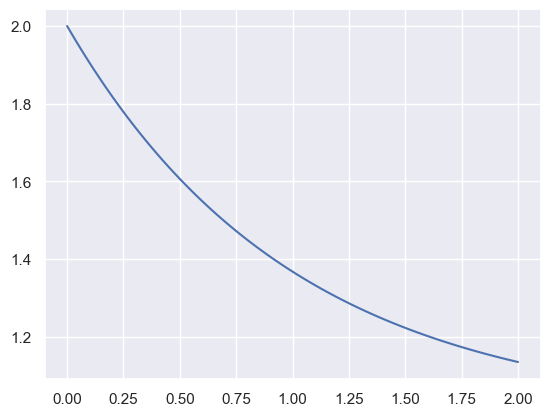

In [13]:
x = np.array([1, 1, 1, 0])
yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
t_grid = np.linspace(0, 2, 100)
y = yfunc(t_grid)
plt.plot(t_grid, y)

Now, let's consider some fancier examples. We'll even use some Seaborn code.

<Axes: xlabel='timepoint', ylabel='signal'>

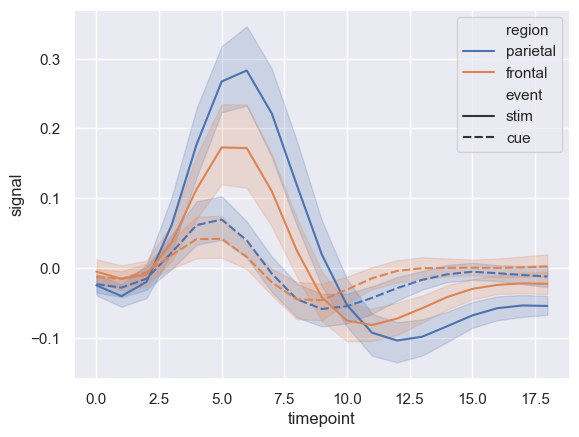

In [14]:
# https://seaborn.pydata.org/examples/errorband_lineplots.html
# Load an example dataset with long-form data
sns.set_theme(style="darkgrid")
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

<Axes: >

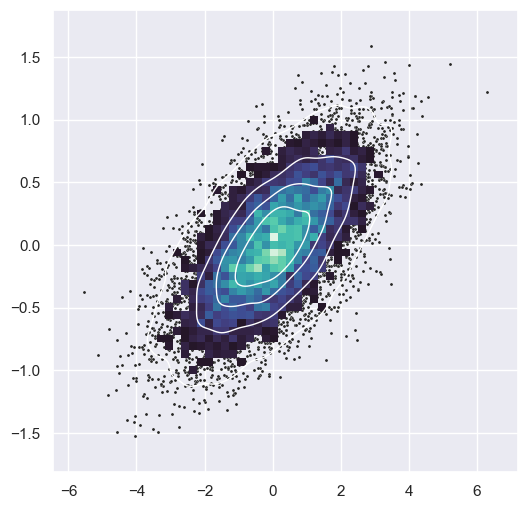

In [15]:
# https://seaborn.pydata.org/examples/layered_bivariate_plot.html
# sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

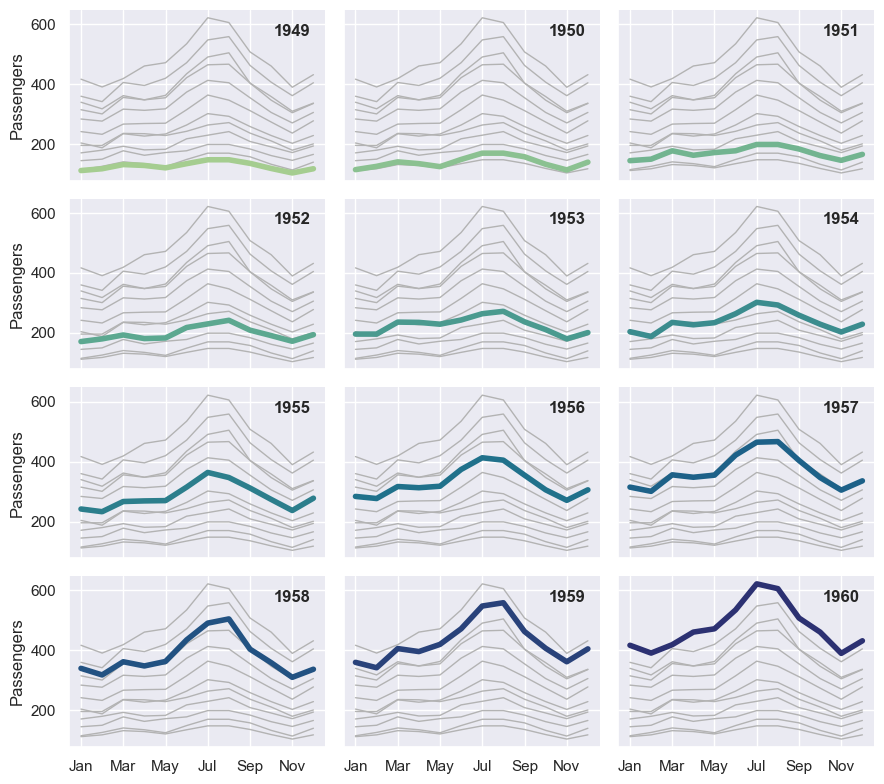

In [16]:
# https://seaborn.pydata.org/examples/timeseries_facets.html
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

In [17]:
# Install with:
# conda install -c plotly plotly=5.9.0
# or
# pip install plotly==5.9.0

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

## 4. Pandas

From Wikipedia, "`pandas` is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license. The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. Its name is a play on the phrase "Python data analysis" itself. Wes McKinney started building what would become pandas at AQR Capital while he was a researcher there from 2007 to 2010."

In [18]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [19]:
area_dict = {
    'California': 423967, 
    'Texas': 695662, 
    'New York': 141297,
    'Florida': 170312, 
    'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [20]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_table(url, sep='|', index_col='user_id')

In [21]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


## 5. StatsModels

"`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration."

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [24]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.90e-08
Time:                        19:12:06   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     25.76
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.07e-09
Time:                        19:12:06   Log-Likelihood:                -7.0793
No. Observations:                 100   AIC:                             20.16
Df Residuals:                      97   BIC:                             27.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4292      0.072     19.758      0.000       1.286       1.573
x1             0.1090      0.093      1.177      0.242      -0.075       0.293
x2             0.6596      0.094      7.007      0.000       0.473       0.846
==============================================================================
Omnibus:                        7.957   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.373
Skew:                          -0.132   Prob(JB):                        0.185
Kurtosis:                       2.140   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. scikit-learn

ScitKit Learn is a machine learning library for Python. It is built on NumPy, SciPy, and Matplotlib. It is designed to be easy to use and to work well with the other packages in the PyData stack. Although there are many other machine learning libraries for Python, scikit-learn is the most popular and is the best place to start if you are new to machine learning.


In the example below, the authors
start by creating a simple dataset with two features. They fit a PCA estimator to display the two principal components of this dataset, i.e. the two directions that explain the most variance in the data.

From here: https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

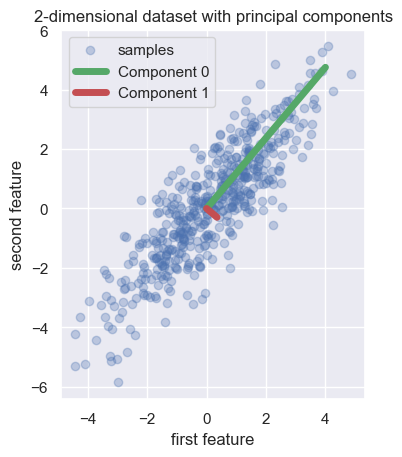

In [26]:
# Example from here:
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

## 7. IPyWidgets

### 7.1 Lorenz Attractor: Lorenz System of Differential Equations


In [27]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [28]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(tup, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = tup
        """Compute the time-derivative of a Lorentz system."""
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

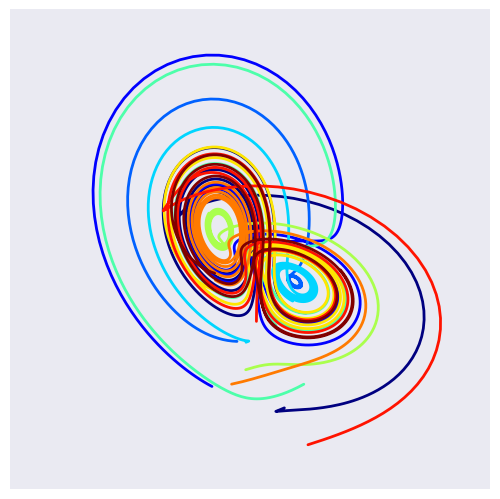

In [29]:
t, x_t = solve_lorenz(angle=0, N=10)

In [30]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
## Uncomment below for interactive viewing
# display(w)

### 7.2 Mean-Variance Portfolio Analysis

Suppose that you have two different assets that you could invest in, asset 0 or asset 1. Let $R_0$ and $R_1$ be random variables representing the gross return on asset 0 and asset 1, respectively. Let the return of each have means $\mu_0$ and $\mu_1$ and standard deviations $\sigma_0$ and $\sigma_1$. Let $w$ be portfolio weight allocated to asset 1. Then, the return on the portfolio is

$$
R = (1-w) R_0 + w R_1.
$$

$$
E[R_0] = \mu_0
$$
$$
E[R_1] = \mu_1
$$

\begin{align}
std(R_0) &= \sigma_0 \\
std(R_1) &= \sigma_1
\end{align}

Now, what about the mean and standard devation of $R$?

$$
E[R] = (1-w) \mu_0 + w \mu_1.
$$

$$
% std(R) = \, ? %\sqrt{(1-w)^2 \sigma_0^2 + w^2 \sigma_1^2 + 2 w (1-w) \rho \sigma_0 \sigma_1}
std(R) = \sqrt{(1-w)^2 \sigma_0^2 + w^2 \sigma_1^2 + 2 w (1-w) \rho \sigma_0 \sigma_1}
$$


In [31]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt

def plot_portfolio(weight_1=.5, mu0=2.0, mu1=8.0, sd0=5.0, sd1=10.0, corr=0.0, Rf=1.0):
    
    #calculate portfolio properties
    expected_return = lambda a: a * mu1 + (1-a) * mu0
    add_sd = lambda a: np.sqrt((1-a)**2 * sd0**2 + a**2 * sd1**2 
                            + 2*a*(1-a)*corr*sd0 * sd1)
    
    #calculate frontier
    weight_1_range = np.linspace(-2.0, 2.0, 100)
    y = expected_return(weight_1_range)
    x = add_sd(weight_1_range)
    
    #Plot frontier and points
    XRIGHT = 15
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot([sd0, sd1], [mu0, mu1], 'o')
    ax.axis([0, XRIGHT, -2, 10])
    ax.plot([add_sd(weight_1)], [expected_return(weight_1)], 'o')
    plt.xlabel('standard deviation')
    plt.ylabel('expected return')
    
    if corr < 1:
        #calculate risk-free rate frontier
        one_vec = np.array([[1,1]]).T
        Sigma = np.array([[sd0**2, sd0 * sd1 * corr],
                          [sd0 * sd1 * corr, sd1**2]])
        mu_vec = np.array([[mu0, mu1]]).T
        #A = np.linalg.inv(Sigma) @ (mu_vec - one_vec * Rf)
        A = np.linalg.solve(Sigma, (mu_vec - one_vec * Rf))
        weights_vec = A * (one_vec.T @ A)**(-1)
        Rt = mu_vec.T @ weights_vec
        sd_t = np.sqrt(weights_vec.T @ Sigma @ weights_vec)
        slope = (Rt - Rf) / (sd_t - 0)    
        ax.plot([0, sd_t.item(), (sd_t + XRIGHT).item()], [Rf, Rt.item(), (Rt + XRIGHT * slope).item() ])


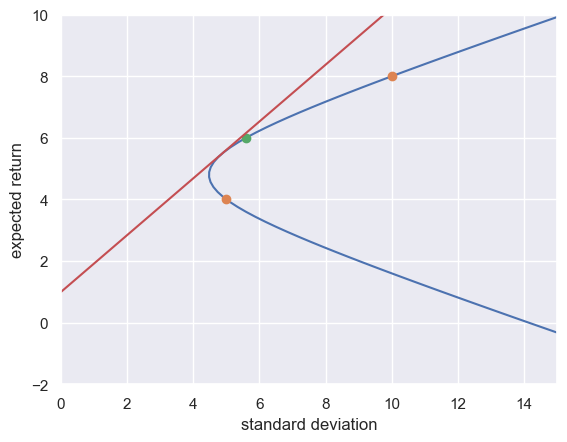

In [32]:
plot_portfolio(weight_1=.5, mu0=4.0, mu1=8.0, sd0=5.0, sd1=10.0, corr=0.0, Rf=1.0)

In [33]:
## Uncomment below for interactive viewing
# interact(plot_portfolio, weight_1=(-1.0, 2.0, .001), corr=(-1.0, 1.0, .01));

**DISCUSS: The example above demonstrate what is meant by a set of efficient portfolios? What do you think is meant by an efficient portfolio?**

For more information about calculating the tangency portfolio, see here: https://bookdown.org/compfinezbook/introcompfinr/Efficient-portfolios-of.html